In [ ]:
!git clone https://github.com/haotian-liu/LLaVA.git
%cd LLaVA
!pip install -e .
!pip install transformers accelerate timm xformers opencv-python
!git lfs install
!git clone https://huggingface.co/liuhaotian/llava-v1.5-7b checkpoints/llava-v1.5-7b


Cloning into 'LLaVA'...
remote: Enumerating objects: 2297, done.
remote: Total 2297 (delta 0), reused 0 (delta 0), pack-reused 2297 (from 1)
Receiving objects: 100% (2297/2297), 13.71 MiB | 15.26 MiB/s, done.
Resolving deltas: 100% (1404/1404), done.
/content/LLaVA
Obtaining file:///content/LLaVA
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.7/137.7 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/

INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/20

In [ ]:
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]


Saving 1.jpg to 1.jpg
Saving 3.jpg to 3.jpg
Saving 14.jpg to 14.jpg
Saving 54.jpg to 54.jpg


In [ ]:
prompt = '''
Есть такие кластеры: голосование, либо логинка. Кластер может быть только один!

Если на картинке есть изображения двух и больше людей - младенцев, мальчиков, девочек и т.д, то это голосование и все (только один кластер).
Если есть qr-код или написано log in by telegram, то это логинка и все (только один кластер).


Выведи для каждой картинки кластер.
'''


In [ ]:
results = {}

for image_path in uploaded.keys():
    !python3 -m llava.eval.run_llava \
      --model-path liuhaotian/llava-v1.5-7b \
      --image-file "$image_path" \
      --query "$prompt" > temp_output.txt

    with open("temp_output.txt", "r") as f:
        lines = f.readlines()
        if lines:
            last_line = lines[-1].strip()
            results[image_path] = last_line
        else:
            results[image_path] = "нет вывода"

2025-04-02 07:31:34.421563: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743579094.444438   12676 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743579094.451410   12676 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
You are using a model of type llava to instantiate a model of type llava_llama. This is not supported for all configurations of models and can yield error

1.jpg → Для данной картинки, на которой изображены два младенца, кластер - голосование.


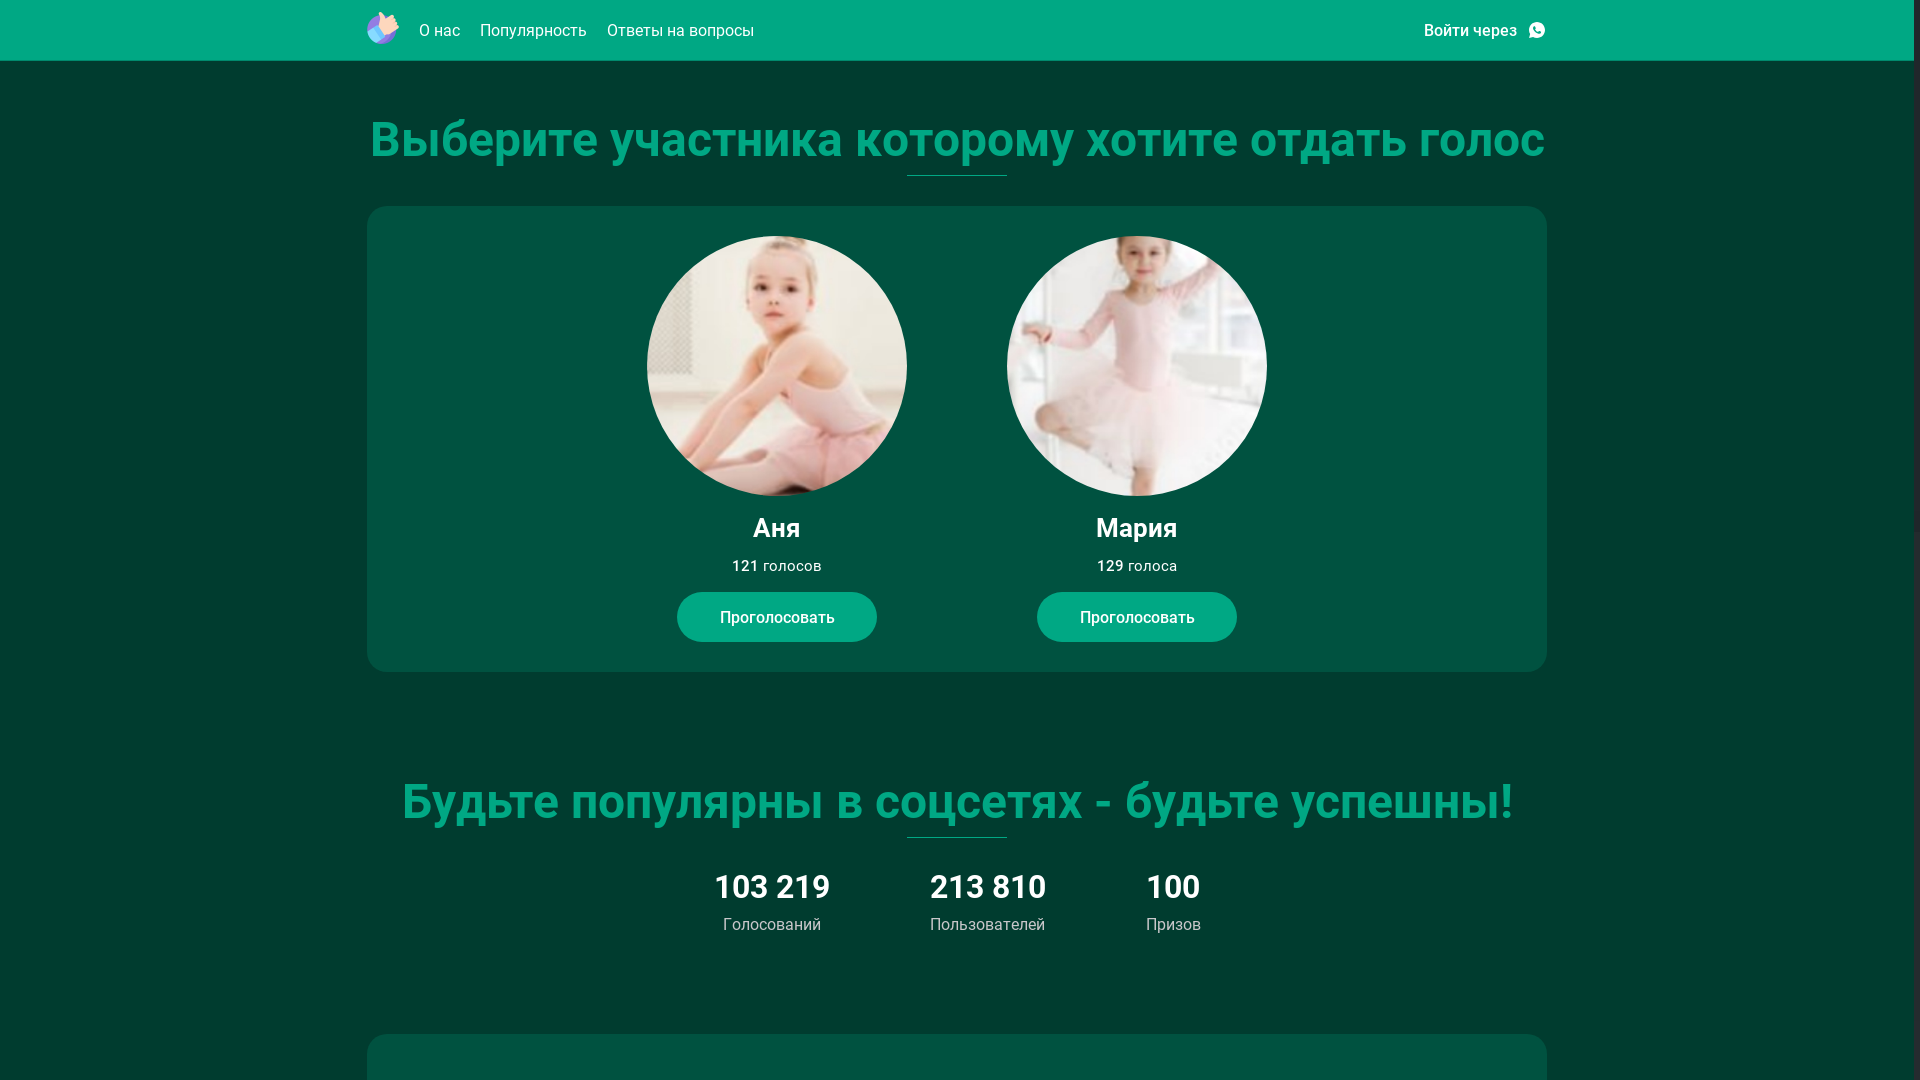

3.jpg → Кластер: голосование


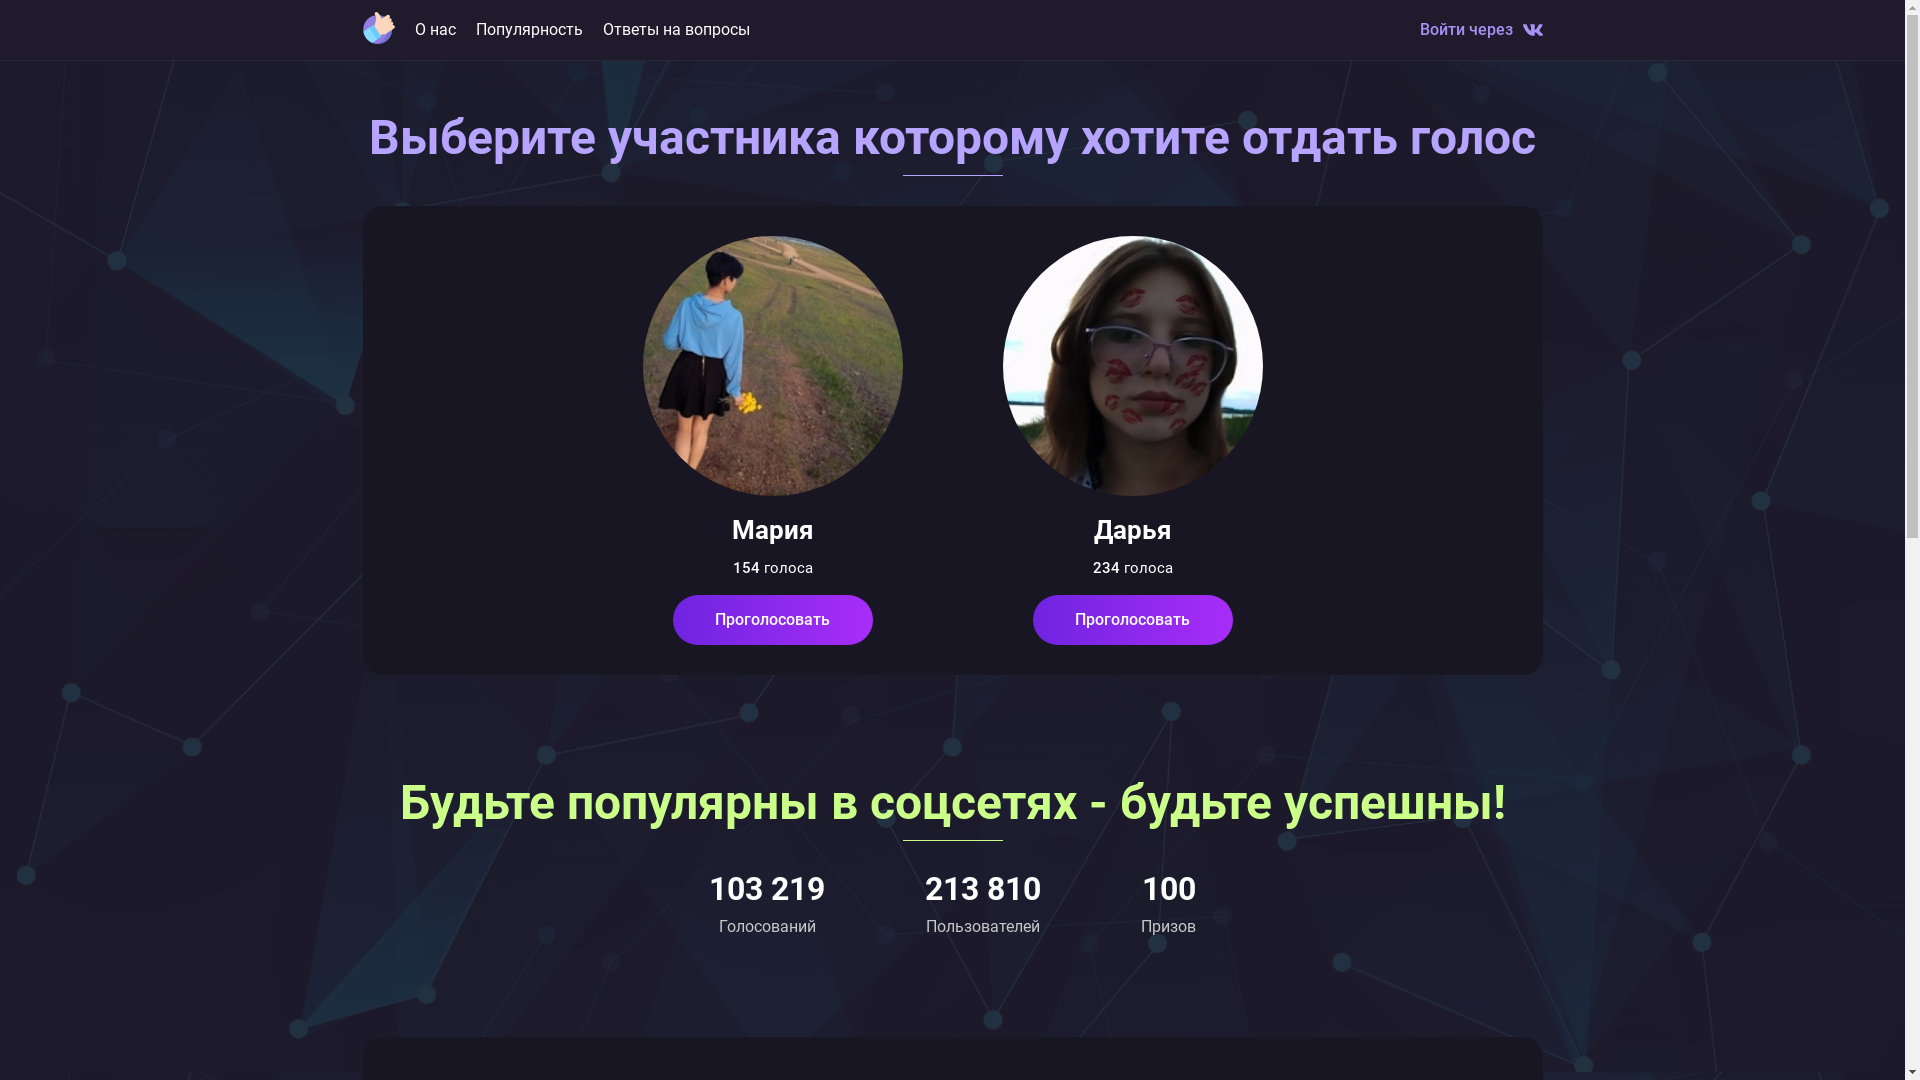

14.jpg → Кластер: логинка


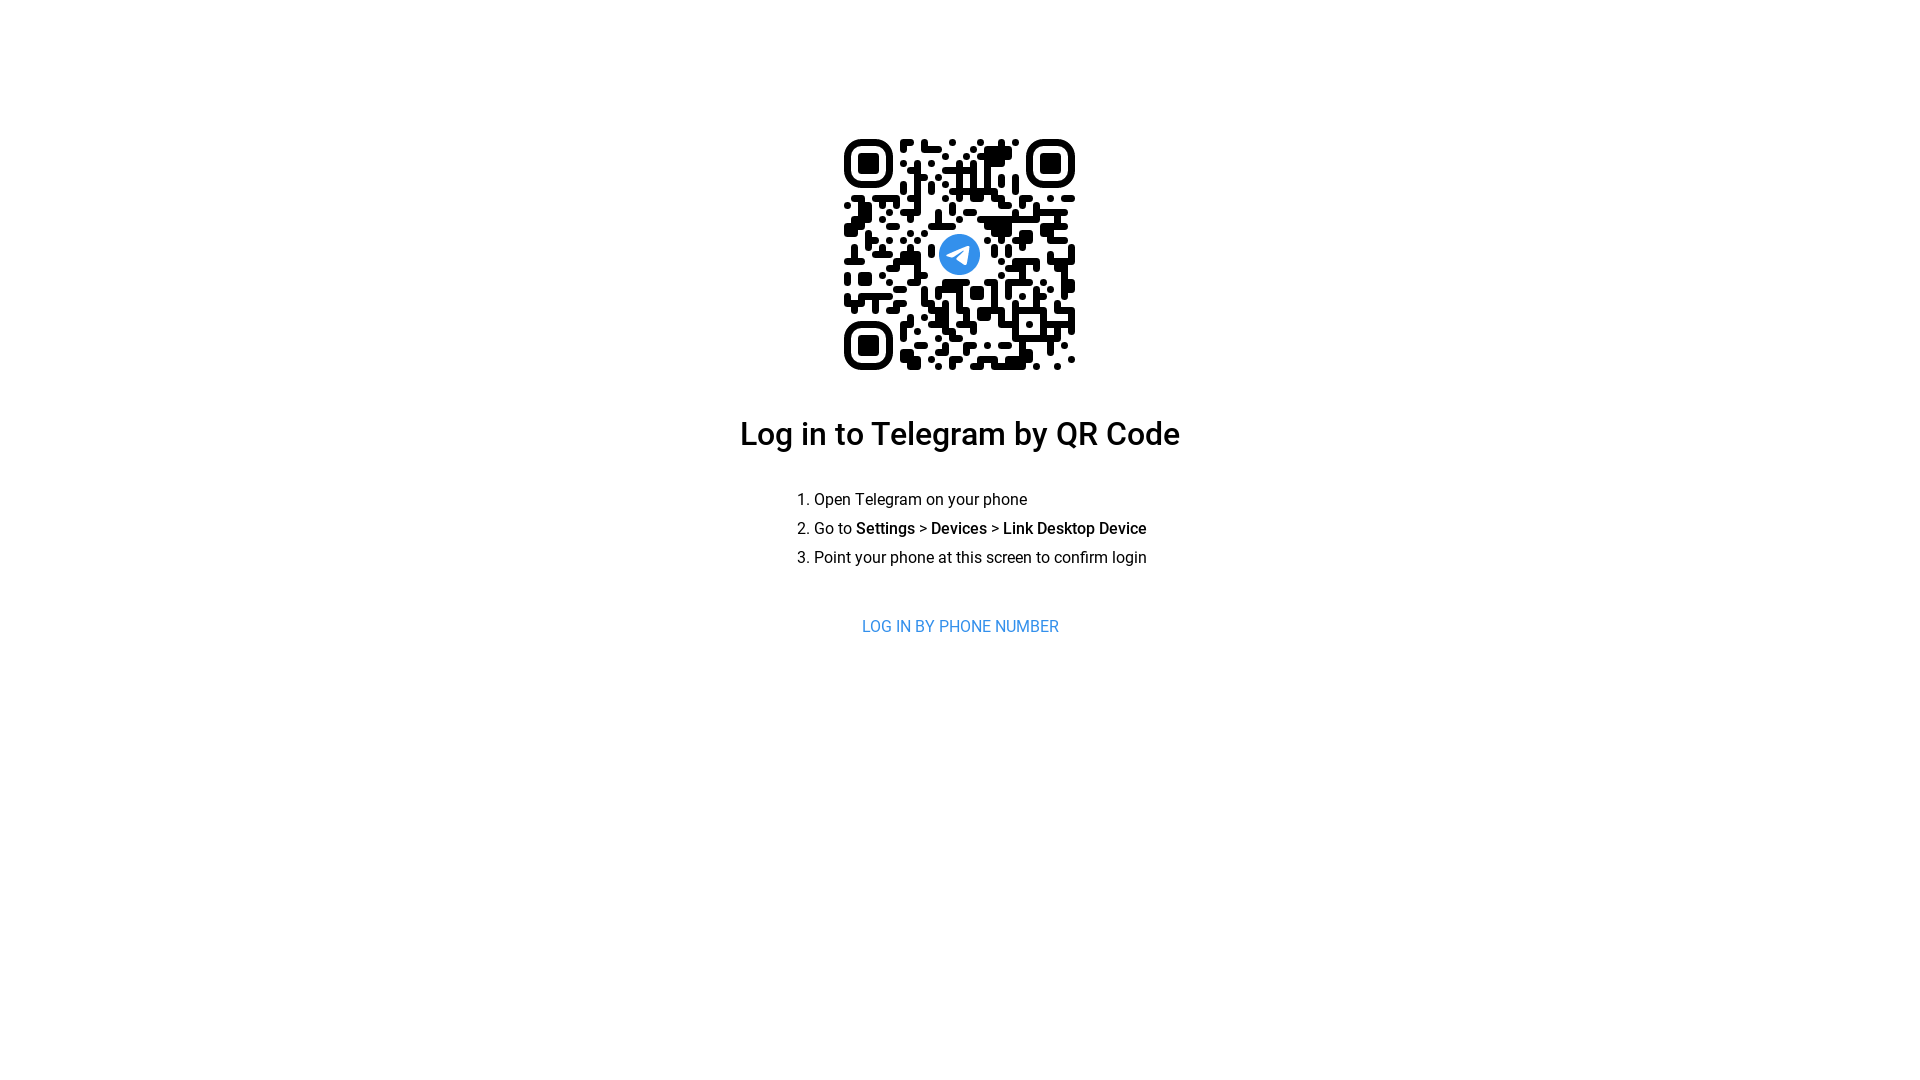

54.jpg → Кластер: голосование


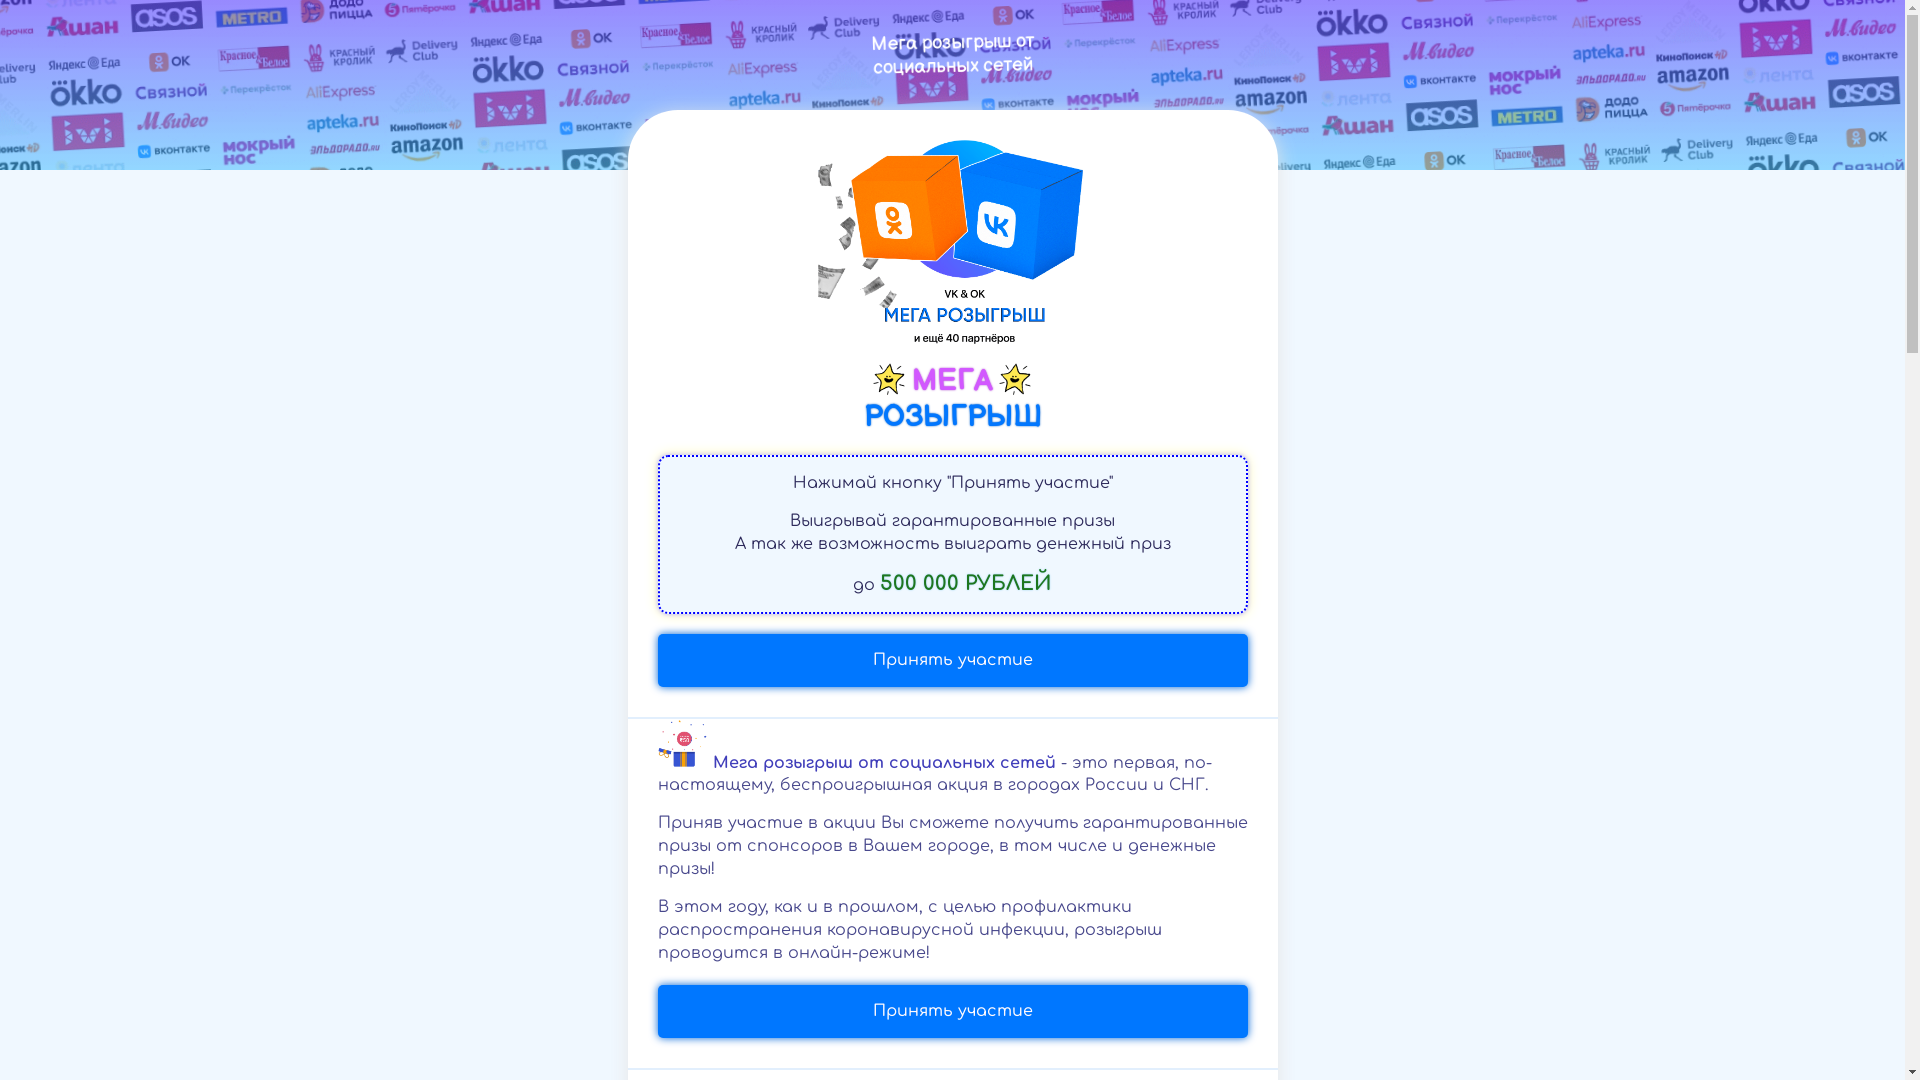

In [ ]:
from IPython.display import display, Image as IPyImage

for fname, answer in results.items():
    print(f"{fname} → {answer}")
    display(IPyImage(fname))
